In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

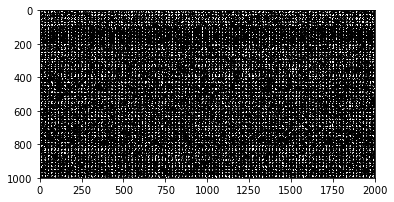

In [2]:
gray = cv2.imread ("digits.png", 0)
plt.imshow(gray, cmap='gray')

In [3]:
slike = [np.hsplit(redak, 100) for redak in np.vsplit(gray,50)]
x = np.array (slike)
x.shape

(50, 100, 20, 20)

In [4]:
train = x[:,0:50].reshape(-1, 400).astype(np.float32)
test = x[:,50:100].reshape(-1, 400).astype(np.float32)

train.shape, test.shape

((2500, 400), (2500, 400))

In [5]:
k = np.arange(10)
train_labels = np.repeat(k, 250)[:, np.newaxis].astype(np.float32)
test_labels = np.repeat(k, 250)[:, np.newaxis].astype(np.float32)
train_labels.shape, test_labels.shape

((2500, 1), (2500, 1))

In [6]:
knn = cv2.ml.KNearest_create();
knn.train (train, cv2.ml.ROW_SAMPLE, train_labels)

True

[[ 0.  0.  0.  0.  0.  0.]] 0.0


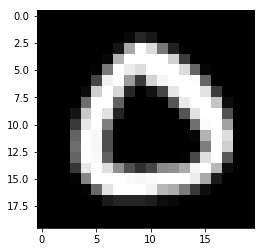

In [7]:
slika = x[2][12]
plt.imshow(slika, cmap='gray')
slika = slika.reshape(-1, 400).astype(np.float32)
ret, result, neighbours, dist = knn.findNearest(slika, k=6)
print (neighbours, ret)

In [8]:
ret, result, neighbours, dist = knn.findNearest(test, k=1)
matches = result == test_labels
tocno = np.count_nonzero(matches)
tocno*100/result.size

92.0

In [9]:
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt
from ipywidgets import *

In [ ]:
vc = cv2.VideoCapture(0)
vc.open(0)
plt.ion()

if vc.isOpened():
    stvoren, slika = vc.read()
    slika = cv2.cvtColor(slika, cv2.COLOR_BGR2RGB)
    kamera = plt.imshow(slika)
else:
    stvoren = False
    
while stvoren:
    try:
        stvoren, slika = vc.read()
        slika = cv2.cvtColor (slika, cv2.COLOR_BGR2RGB)
        
        #Ovdje ide programski kod
        siva_slika = cv2.cvtColor (slika, cv2.COLOR_BGR2GRAY)
        kamera.set_data(slika)
        plt.draw()
        
        try:
            plt.pause(0.01)
        except Exception:
            pass
    except KeyboardInterrupt:
        vc.release()